<a href="https://colab.research.google.com/github/Timure228/Hands-on-ML/blob/main/Chapter_11_Train_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Keras uses Glorot initialization to avoid gradient vanishing, to change it to he_normal initialization use kernel_initializer
import tensorflow as tf

dense = tf.keras.layers.Dense(50, activation="relu",
                              kernel_initializer="he_normal")

In [ ]:
# Or use VarianceScaling initializer if you want he_normal initialization
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

In [ ]:
# Leaky ReLU
leaky_relu = tf.keras.layers.LeakyReLU(negative_slope=0.2) # negative_slope changes the negative slope (the more the more)
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

In [ ]:
# ELU activation function
elu = tf.keras.layers.ELU(alpha=0.3) # alpha = slope of negative section
dense_elu = tf.keras.layers.Dense(50, activation=elu, kernel_initializer="he_normal") # or activation="elu"

In [ ]:
# SELU activation function
dense_elu = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="he_normal")

In [ ]:
# GELU, Swish, and Mish
dense_elu = tf.keras.layers.Dense(50, activation="gelu", kernel_initializer="he_normal")
dense_elu = tf.keras.layers.Dense(50, activation="swish", kernel_initializer="he_normal")
dense_elu = tf.keras.layers.Dense(50, activation="mish", kernel_initializer="he_normal")

# Batch normalization

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

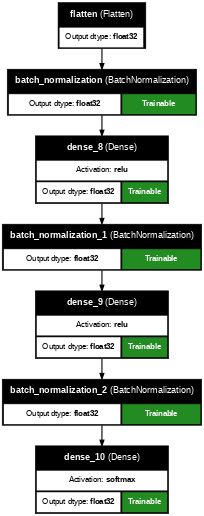

In [ ]:
tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [ ]:
# The last two parameters of BN layer are non-trainable (non-trainable = untouched by backpropagation)
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
# Batch normalization but now before activation function and after first Dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False), # use_bias=False because BN includes one parameter per input
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

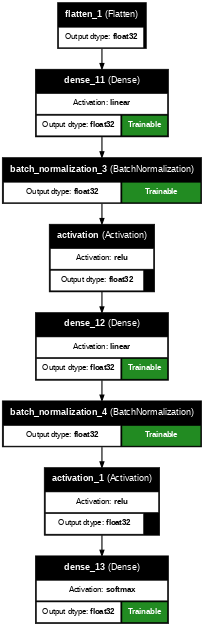

In [ ]:
tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [ ]:
# Gradient clipping (cut the gradient, so that it doesn't exceed specific threshold)
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)

# Transfer Learning
Code examples are not executable!

In [ ]:
# Using layers from previous NNs to train new ones
model_A = tf.keras.models.load_model("my_model_A") # Example
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))
# In this context model A will change if model B as well
# To avoid it clone model A before sharing the layers
model_A_clone = tf.keras.models.clone_model(model_A) # clone_model() clones only architecture, not the weights!
model_A_clone.set_weights(model_A.get_weights()) # use set_weights() to set weights as well

ValueError: File format not supported: filepath=my_model_A. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(my_model_A, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# Freeze shared layers from A to avoid wrecking them by backpropagation
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.complie(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B)) # Train the model

for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True # Now you can unfreeze the layers

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001) # better decreasing the learning rate after unfreezing
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer, # Always compile the model after freezing/unfreezing the layers
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

In [ ]:
# Nesterov optimization (momentum)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [ ]:
# RMSprop optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
import tensorflow as tf

In [ ]:
# 3 variants of adam - AdaMax, Nadam, AdamW

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                beta_2=0.999)

adam_max = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9,
                                beta_2=0.999)

nadam = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, # Adam + Nesterov trick
                                beta_2=0.999)

adam_w = tf.keras.optimizers.AdamW(learning_rate=0.001, beta_1=0.9, # Adam with weight decay regularization
                                beta_2=0.999)

# Learning rate scheduling

In [ ]:
# Implementing exponential scheduling
def exponential_decay_fn(epoch):
  return 0.01 * 0.1 ** (epoch / 20)

# Or

def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1 ** (epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
import numpy as np
X_train = np.random.randn(28, 28)
y_train = np.random.randn(10)

In [ ]:
# Then use is as callback by fitting the model
rate_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=exponential_decay_fn)

In [ ]:
# Implementing piecewise constant scheduling
def piecewise_constant_fn(epoch):
  if epoch < 5:
    return 0.01
  elif epoch < 15:
    return 0.005
  else:
    return 0.001

piecewise_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule=piecewise_constant_fn)

In [ ]:
# Implement ReduceLROnPlateau callback. It multiplies the learning rate by 0.5 if the best validation loss does not improve for 5 epochs
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [ ]:
# Create your own lr scheduling with one of the optimizers.schedules classes
# Here is implementation of exponential_decay_fn() defined earlier
import math

batch_size = 32
n_epochs = 25
n_steps = n_epochs * math.ceil(len(X_train) / batch_size)
scheduled_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=n_steps, decay_rate=0.1)
optimizer = tf.keras.optimizers.SGD(learning_rate=scheduled_learning_rate)

# L1 and L2 Regularization

In [ ]:
# There's how to use regularizations

layer_l1 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1(0.01))

layer_l2 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

layer_l1_l2 = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

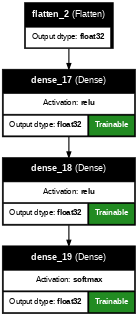

In [ ]:
# If you always have the same layers, instead of writting each use partial()
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")

])

tf.keras.utils.plot_model(model, show_dtype=True, show_layer_names=True, show_layer_activations=True, dpi=40, show_trainable=True)

In [ ]:
# Another example of partial()
print_ = partial(print)
print_("hi")
print_("merhaba")
print_("привет")
print_("hola")
print_("hallo")

hi
merhaba
привет
hola
hallo


In [ ]:
# Dropout (drops some neurons *except ones in the output layer with p (probability))
Dense = partial(tf.keras.layers.Dense, activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(100),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(100),
    tf.keras.layers.Dropout(rate=0.2),
    Dense(10, activation="softmax", kernel_initializer="glorot_uniform")])

# Make sure to evaluate the training loss without dropout (Because dropout is active during the training and gives out not actual train loss)

In [ ]:
# Monte Carlo Dropout
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, training=False):
    return super().call(inputs, training=True)

In [ ]:
# Max-Norm regularization
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))

# Exercises

not the perfect solution*

## 8.

### 8 (a)

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [19]:
# Create validation set
X_val, y_val = X_train[-15_000:], y_train[-15_000:]
X_train, y_train = X_train[:-15_000], y_train[:-15_000]

In [34]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [3]:
X_train[0].shape, y_train[0]

((32, 32, 3), array([6], dtype=uint8))

In [4]:
class_names = ["airplane",	"automobile", "bird",	"cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [76]:
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="he_normal", activation="swish")


model = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Flatten(),
])

for _ in range(20):
  model.add(DenseLayer(100))
model.add(tf.keras.layers.Dense(len(class_names), activation="softmax", kernel_initializer="he_normal"))

In [77]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

### 8 (b)

In [80]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10) # patience = number of epochs with no improvement after which training will be stopped.

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [82]:
history_1 = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=25)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3578 - loss: 1.7262 - val_accuracy: 0.3026 - val_loss: 1.8856
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3485 - loss: 1.7024 - val_accuracy: 0.3276 - val_loss: 1.9015
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3866 - loss: 1.6629 - val_accuracy: 0.3275 - val_loss: 1.8939
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3835 - loss: 1.6629 - val_accuracy: 0.2886 - val_loss: 2.0197
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4080 - loss: 1.6331 - val_accuracy: 0.3247 - val_loss: 1.9083
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3956 - loss: 1.6364 - val_accuracy: 0.3521 - val_loss: 1.8278
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4120 - loss: 1.6079 - val_accuracy: 0.3541 - val_loss: 1.8917
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4213 - loss: 1.5555 - val_accu

In [84]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3546 - loss: 1.9044


[1.917996883392334, 0.35749998688697815]

In [85]:
y_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [86]:
tf.argmax(y_preds[0]), y_test[0]

(<tf.Tensor: shape=(), dtype=int64, numpy=5>, array([3], dtype=uint8))

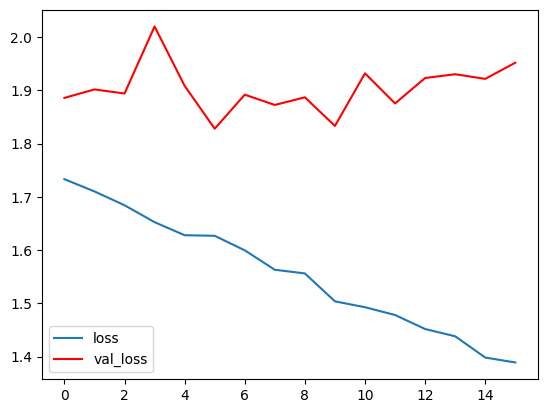

In [83]:
import matplotlib.pyplot as plt

plt.plot(history_1.history["loss"], label="loss")
plt.plot(history_1.history["val_loss"], c="red", label="val_loss")
plt.legend()

### 8 (c)

In [100]:
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="he_normal", activation="swish")


model_bn = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    tf.keras.layers.Flatten(),
])

for i in range(20):
    model_bn.add(tf.keras.layers.BatchNormalization())
    model_bn.add(DenseLayer(100))
model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Dense(len(class_names), activation="softmax", kernel_initializer="he_normal"))

In [102]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10) # patience = number of epochs with no improvement after which training will be stopped.

model_bn.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [110]:
history_2 = model_bn.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=20)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7184 - loss: 0.8089 - val_accuracy: 0.3844 - val_loss: 2.2571
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7167 - loss: 0.8766 - val_accuracy: 0.3907 - val_loss: 2.2079
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7491 - loss: 0.7439 - val_accuracy: 0.3929 - val_loss: 2.2012
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7310 - loss: 0.8172 - val_accuracy: 0.3773 - val_loss: 2.3856
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6179 - loss: 1.1589 - val_accuracy: 0.3866 - val_loss: 2.2743
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6871 - loss: 0.9391 - val_accuracy: 0.3894 - val_loss: 2.0904
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7388 - loss: 0.7804 - val_accuracy: 0.3975 - val_loss: 2.2029
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7702 - loss: 0.7307 - val_accu

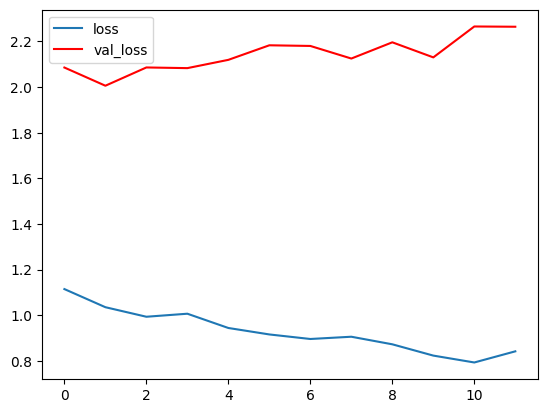

In [109]:
import matplotlib.pyplot as plt

plt.plot(history_2.history["loss"], label="loss")
plt.plot(history_2.history["val_loss"], c="red", label="val_loss")
plt.legend()

In [111]:
model_bn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3930 - loss: 2.3696


[2.385864019393921, 0.39239999651908875]

### 8 (d)

In [122]:
# Self-normalizing model
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_sn = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_sn.add(DenseLayer(100))
model_sn.add(tf.keras.layers.Dense(len(class_names), activation="softmax", kernel_initializer="he_normal"))

In [123]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, nesterov=True)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_sn.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [124]:
history_3 = model_sn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70)

Epoch 1/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.1013 - loss: 2.3691 - val_accuracy: 0.1404 - val_loss: 2.2901
Epoch 2/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1516 - loss: 2.2779 - val_accuracy: 0.1509 - val_loss: 2.3337
Epoch 3/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.1565 - loss: 2.2647 - val_accuracy: 0.1597 - val_loss: 2.2553
Epoch 4/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1587 - loss: 2.2510 - val_accuracy: 0.1111 - val_loss: 2.2899
Epoch 5/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1726 - loss: 2.2442 - val_accuracy: 0.1123 - val_loss: 2.3352
Epoch 6/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1699 - loss: 2.2317 - val_accuracy: 0.1887 - val_loss: 2.2181
Epoch 7/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1661 - loss: 2.2239 - val_accuracy: 0.1117 - val_loss: 2.3672
Epoch 8/70
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1655 - loss: 2.2291 - val_accu

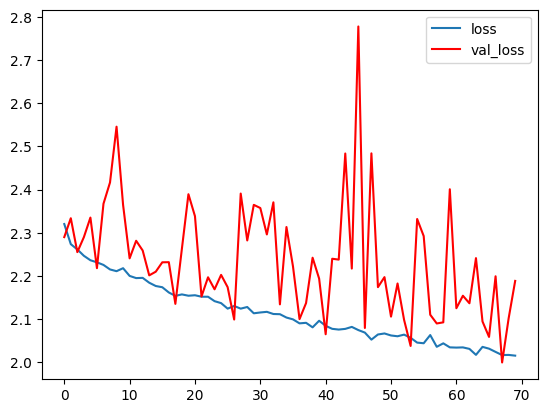

In [125]:
import matplotlib.pyplot as plt

plt.plot(history_3.history["loss"], label="loss")
plt.plot(history_3.history["val_loss"], c="red", label="val_loss")
plt.legend()

### 8 (e)

In [137]:
# Self normalization model with alpha dropout
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_d = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_d.add(tf.keras.layers.AlphaDropout(rate=0.2))
  model_d.add(DenseLayer(100))
model_d.add(tf.keras.layers.AlphaDropout(rate=0.2))
model_d.add(tf.keras.layers.Dense(len(class_names), activation="softmax", kernel_initializer="he_normal"))

In [138]:
model_d.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_21 (AlphaDropout) │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_403 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_22 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_23 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_24 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_406 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_25 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_407 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_26 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_408 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_27 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_409 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_28 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_410 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_29 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_411 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_30 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_412 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_31 (AlphaDropout) │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_413 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ alpha_dropout_32 (AlphaDropout) │ (None, 100)            │             

 Total params: 500,210 (1.91 MB)

 Trainable params: 500,210 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_d.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [140]:
history_4 = model_d.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.0963 - loss: 3.0825 - val_accuracy: 0.0979 - val_loss: 2.7105
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1117 - loss: 2.9788 - val_accuracy: 0.0979 - val_loss: 2.5677
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0948 - loss: 2.9014 - val_accuracy: 0.0979 - val_loss: 2.4893
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1008 - loss: 2.8503 - val_accuracy: 0.0979 - val_loss: 2.5197
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1046 - loss: 2.8159 - val_accuracy: 0.0979 - val_loss: 2.4438
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1019 - loss: 2.7955 - val_accuracy: 0.1031 - val_loss: 2.3980
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0928 - loss: 2.7688 - val_accuracy: 0.1017 - val_loss: 2.3606
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0951 - loss: 2.7179 - val_acc

In [131]:
# Use MC Dropout without retraining the model
model_d_clone = tf.keras.models.clone_model(model_d) # clone_model() clones only architecture, not the weights!
model_d_clone.set_weights(model_d.get_weights()) # use set_weights() to set weights as well

In [132]:
# Monte Carlo Dropout
class MCDropout(tf.keras.layers.Dropout):
  def call(self, inputs, training=False):
    return super().call(inputs, training=True)

In [141]:
# Self normalization model with alpha dropout
from functools import partial
DenseLayer = partial(tf.keras.layers.Dense, kernel_initializer="lecun_normal", activation="selu")

standardize_layer = tf.keras.layers.Rescaling(scale=1./255)

model_d_MC = tf.keras.Sequential([
    tf.keras.layers.Input((32, 32, 3)),
    standardize_layer,
    tf.keras.layers.Flatten()
])

for _ in range(20):
  model_d_MC.add(MCDropout(rate=0.2))
  model_d_MC.add(DenseLayer(100))
model_d_MC.add(MCDropout(rate=0.2))
model_d_MC.add(tf.keras.layers.Dense(len(class_names), activation="softmax", kernel_initializer="he_normal"))

In [142]:
# Set the weights from previous model
for i in range(3, 43, 2):
  model_d_MC.layers[i].set_weights(model_d_clone.layers[i].get_weights())

In [144]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_d_MC.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [145]:
history_5 = model_d_MC.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 198ms/step - accuracy: 0.0877 - loss: 3.1447 - val_accuracy: 0.0991 - val_loss: 2.7007
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1054 - loss: 2.6550 - val_accuracy: 0.0990 - val_loss: 2.5539
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1045 - loss: 2.5364 - val_accuracy: 0.1004 - val_loss: 2.5016
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1056 - loss: 2.4796 - val_accuracy: 0.1065 - val_loss: 2.4315
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0917 - loss: 2.4373 - val_accuracy: 0.0973 - val_loss: 2.4568
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.0987 - loss: 2.4253 - val_accuracy: 0.1035 - val_loss: 2.3937
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.0976 - loss: 2.3885 - val_accuracy: 0.1023 - val_loss: 2.3834
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1001 - loss: 2.3954 - val_ac

### 8 (f)

In [ ]:
# 1cycle implementation (generated with ChatGPT)
from tensorflow.keras.callbacks import Callback
import math

class OneCycleScheduler(Callback):
    def __init__(self, max_lr, steps, pct_start=0.3, div_factor=25.0, final_div_factor=1e4):
        super().__init__()
        self.max_lr = max_lr
        self.total_steps = steps
        self.pct_start = pct_start
        self.div_factor = div_factor
        self.final_div_factor = final_div_factor
        self.initial_lr = max_lr / div_factor
        self.final_lr = max_lr / final_div_factor

    def on_train_begin(self, logs=None):
        self.step = 0

    def on_batch_begin(self, batch, logs=None):
        pct = self.step / self.total_steps
        if pct < self.pct_start:
            scale = pct / self.pct_start
            learning_rate = self.initial_lr + scale * (self.max_lr - self.initial_lr)
        else:
            scale = (pct - self.pct_start) / (1 - self.pct_start)
            learning_rate = self.max_lr - scale * (self.max_lr - self.final_lr)

        self.model.optimizer.learning_rate.assign(learning_rate)
        self.step += 1

In [ ]:
# Usage (generated with ChatGPT)
steps_per_epoch = len(X_train)
epochs = 10
total_steps = steps_per_epoch * epochs

onecycle = OneCycleScheduler(max_lr=1e-3, steps=total_steps)

model_d_MC.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[onecycle])

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.0965 - loss: 2.6951 - val_accuracy: 0.0971 - val_loss: 2.6731
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0947 - loss: 2.6615 - val_accuracy: 0.1031 - val_loss: 2.6736
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1012 - loss: 2.6779 - val_accuracy: 0.1037 - val_loss: 2.6551
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.1028 - loss: 2.6078 - val_accuracy: 0.0988 - val_loss: 2.6449
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1013 - loss: 2.6495 - val_accuracy: 0.1035 - val_loss: 2.6202
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1017 - loss: 2.6193 - val_accuracy: 0.0960 - val_loss: 2.6143
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.1003 - loss: 2.6006 - val_accuracy: 0.0981 - val_loss: 2.5956
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1053 - loss: 2.5779 - val_accu